In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 从文本文件读取数据
data = np.loadtxt('./accuracy/accuracy_1.txt')

# 获取每一列的数据
col1 = data[0::2, 0]
col2 = data[0::2, 1]
col3 = data[::2, 2]
col4 = data[::2, 3]
col5 = data[::2, 4]

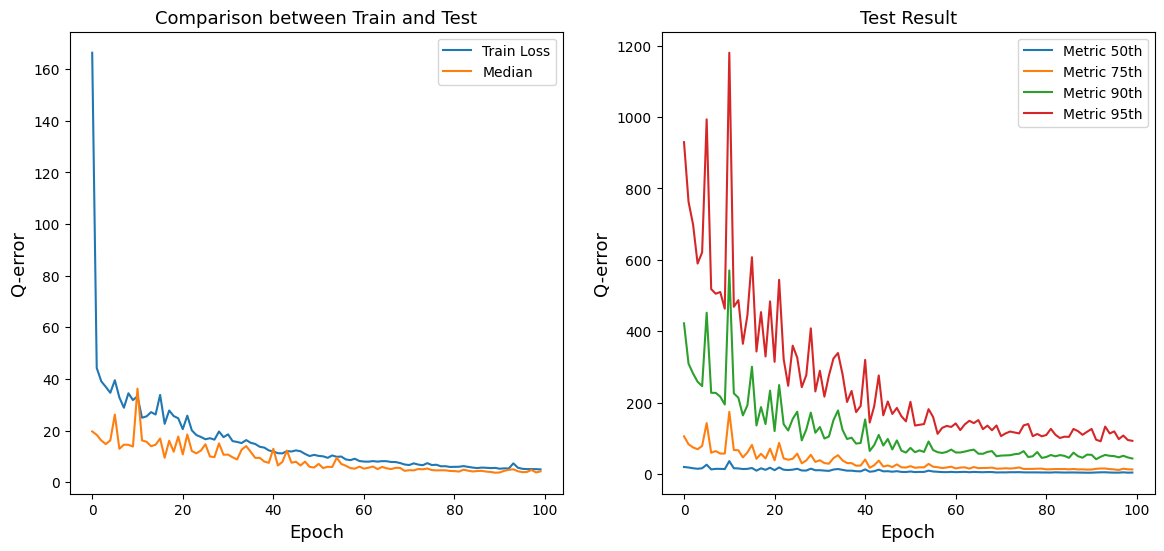

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 第一幅图
ax1.plot(col1, label='Train Loss')
ax1.plot(col2, label='Median')
ax1.legend()
ax1.set_title('Comparison between Train and Test',fontsize=13)
ax1.set_xlabel('Epoch',fontsize=13)
ax1.set_ylabel('Q-error',fontsize=13)

# 第二幅图
# ax2.plot(col1, label='Train Loss')
ax2.plot(col2, label='Metric 50th')
ax2.plot(col3, label='Metric 75th')
ax2.plot(col4, label='Metric 90th')
ax2.plot(col5, label='Metric 95th')
ax2.legend()
ax2.set_title('Test Result', fontsize=13)
ax2.set_xlabel('Epoch', fontsize=13)
ax2.set_ylabel('Q-error',fontsize=13)

plt.savefig('picture/regression.pdf', format='pdf', dpi=600)
# 显示图表
plt.show()

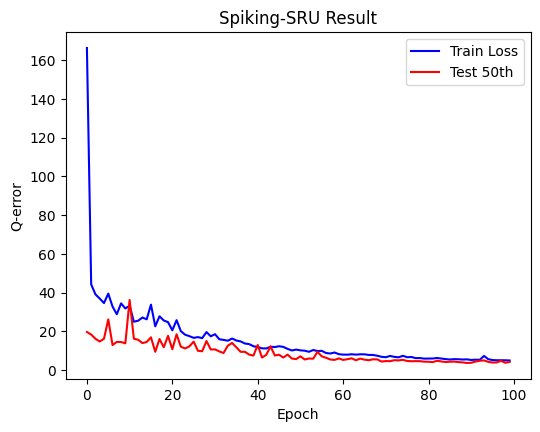

In [3]:
plt.figure(figsize=(6, 4.5))
# 绘制线条并设置颜色
plt.plot(col1, label='Train Loss', color='blue')
plt.plot(col2, label='Test 50th', color='red')
# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('Spiking-SRU Result')
plt.xlabel('Epoch')
plt.ylabel('Q-error')

plt.savefig('picture/regression1.pdf', format='pdf', dpi=600)

# 显示图表
plt.show()

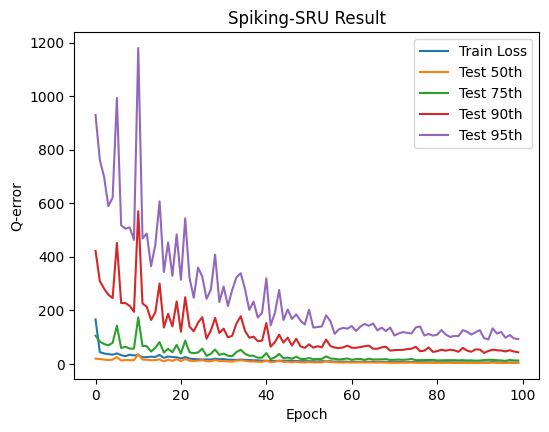

In [4]:
plt.figure(figsize=(6, 4.5))

plt.plot(col1, label='Train Loss')
plt.plot(col2, label='Test 50th')
plt.plot(col3, label='Test 75th')
plt.plot(col4, label='Test 90th')
plt.plot(col5, label='Test 95th')

# 添加图例
plt.legend()

# 设置标题和坐标轴标签
plt.title('Spiking-SRU Result')
plt.xlabel('Epoch')
plt.ylabel('Q-error')

plt.savefig('picture/regression2.pdf', format='pdf', dpi=600)

# 显示图表
plt.show()

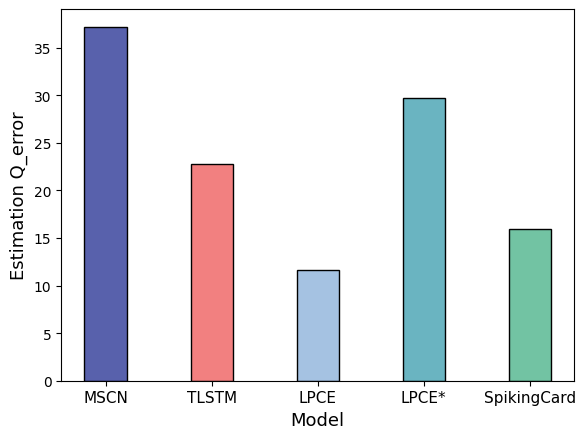

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['MSCN', 'TLSTM', 'LPCE', 'LPCE*', 'SpikingCard']
data = np.array([[37.2], 
                 [22.8], 
                 [11.6],
                 [29.75],
                 [15.96]])

# 绘制Mean值的柱状图
fig, ax = plt.subplots(figsize=(6, 4.5))  # 固定输出大小
x = np.arange(len(model_names))

# 设置不同方法的柱状图颜色
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

# 调整柱状图的宽度以使其更细
width = 0.4

bars = ax.bar(x, data[:, 0], width, color=colors, edgecolor='black', linewidth=1)

# 设置标题和坐标轴标签
# ax.set_title('Comparison of Mean Cardinality Estimation Metrics', fontsize=13, fontweight='bold')
ax.set_xlabel('Model', fontsize=13)
ax.set_ylabel('Estimation Q_error', fontsize=13)

# 设置刻度标签
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)

# 使图像布局更紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/benchbase.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

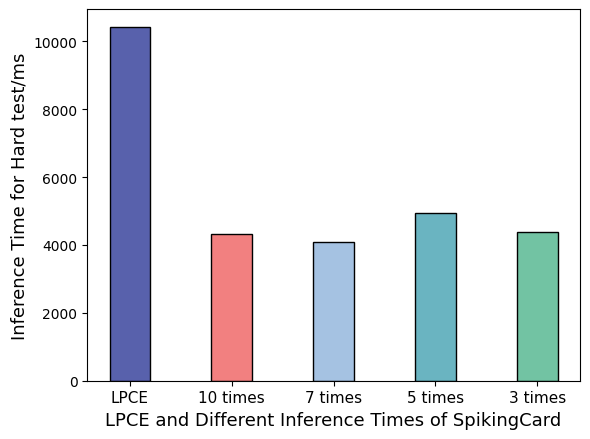

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['LPCE', '10 times', '7 times', '5 times', '3 times']
data = np.array([[10432.49], 
                 [4313.95], 
                 [4074.01],
                 [4950.24],
                 [4392.67]])

# 绘制Mean值的柱状图
fig, ax = plt.subplots(figsize=(6, 4.5))  # 固定输出大小
x = np.arange(len(model_names))

# 设置不同方法的柱状图颜色
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

# 调整柱状图的宽度以使其更细
width = 0.4

bars = ax.bar(x, data[:, 0], width, color=colors, edgecolor='black', linewidth=1)

# 设置标题和坐标轴标签
# ax.set_title('Comparison of Inference Time', fontsize=13, fontweight='bold')
ax.set_xlabel('LPCE and Different Inference Times of SpikingCard', fontsize=13)
ax.set_ylabel('Inference Time for Hard test/ms', fontsize=13)

# 设置刻度标签
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)

# 使图像布局更紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/inference_time.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

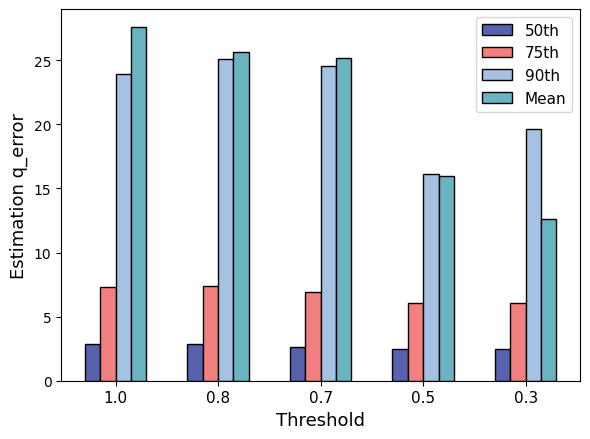

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    # [2.91, 8.01, 30.26, 30.81],  # No filtering
    [2.86, 7.29, 23.90, 27.62],  # Threshold 1.0
    [2.86, 7.41, 25.08, 25.64],  # Threshold 0.8
    [2.62, 6.94, 24.57, 25.21],  # Threshold 0.7
    [2.44, 6.03, 16.11, 15.96],  # Threshold 0.5s
    [2.45, 6.08, 19.65, 12.61]   # Threshold 0.3
])

# 定义阈值和指标
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Comparison Across Different Thresholds of Uncertainty', fontsize=13, fontweight='bold')
ax.set_xlabel('Threshold', fontsize=13)
ax.set_ylabel('Estimation q_error', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/output.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

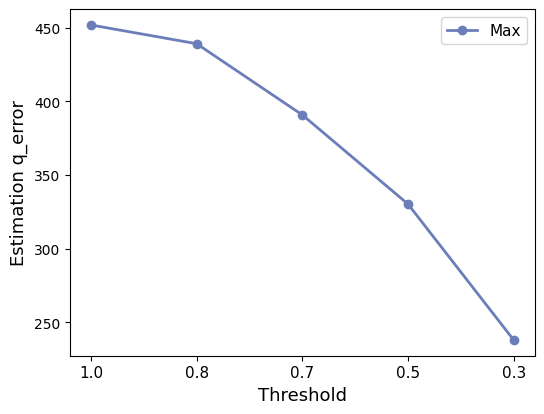

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
model_names = ['SpikingCard']
data = np.array([
    # [646.78],  # No filtering
    [451.87],    # Threshold 1.0
    [439.16],    # Threshold 0.8
    [390.84],    # Threshold 0.7
    [330.32],    # Threshold 0.5
    [238.07]      # Threshold 0.3
])

# Define the thresholds and metrics
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3']
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
metrics = ['Max']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# Plot the line chart
plt.plot(data[:, 0], marker='o', color='#6B7EB9', linewidth=2)

# Set the title and axis labels
# plt.title('Comparison Across Different Thresholds of Uncertainty (Max)', fontsize=13, fontweight='bold')
plt.xlabel('Threshold', fontsize=13)
plt.ylabel('Estimation q_error', fontsize=13)

# Set the x-axis ticks and labels
plt.xticks(np.arange(len(thresholds)), thresholds, fontsize=11)

# Add a legend
plt.legend(metrics, fontsize=11)

# Save the figure as a PDF
plt.savefig('picture/max.pdf', format='pdf', dpi=600)

# Show the plot
plt.show()

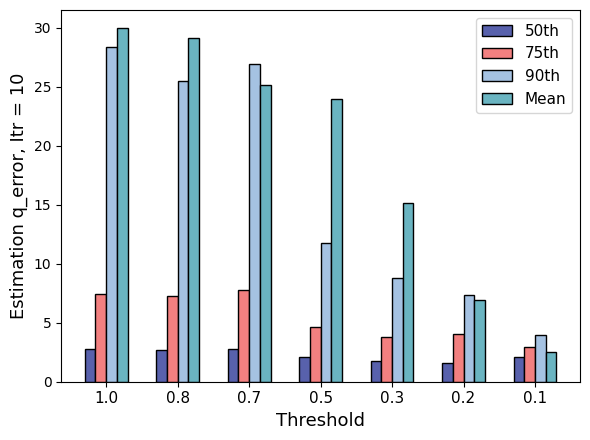

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    # [2.91, 8.01, 30.26, 30.81],  # No filtering
    # [2.861239903979883, 7.87554797894918, 30.73927293771044, 28.968690279696023],  
    # [2.817712420075839, 7.274546326036709, 23.333473220587972, 24.723109124289415],  
    # [2.763041990381155, 7.916872304402786, 27.97584943287697, 25.127764382076393],  
    [2.7735764631757576,7.452086067900485,28.315145702084294,29.99234011182886],  
    [2.718859431078516,7.223316730122892,25.511277500897982,29.129053961270156],
    [2.7645058044768955,7.796271071503527,26.937513786684512,25.127764382076393],
    [2.0769373197426915,4.622555516638672,11.737426883749984,23.97282732272421],
    [1.7390948880037282,3.784539478145833,8.824983252121708,15.16023249995178],
    [1.6157485996711498,4.041060981947811,7.313870349430486,6.909860035993233],
    [2.1046845585535454,2.9441856078103017,3.988830079464212,2.4811216203329725]
])

# 定义阈值和指标
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3', '0.2', '0.1']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Comparison Across Different Thresholds of Uncertainty', fontsize=13, fontweight='bold')
ax.set_xlabel('Threshold', fontsize=13)
ax.set_ylabel('Estimation q_error, Itr = 10', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/itr10.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

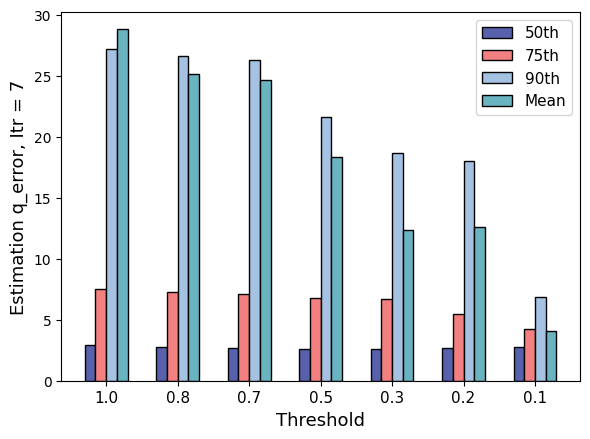

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    # [2.91, 8.01, 30.26, 30.81],  # No filtering
    # [2.861239903979883, 7.87554797894918, 30.73927293771044, 28.968690279696023],  
    # [2.817712420075839, 7.274546326036709, 23.333473220587972, 24.723109124289415],  
    # [2.763041990381155, 7.916872304402786, 27.97584943287697, 25.127764382076393],  
    
    [2.9138276092128406,7.555916206146279,27.22349327787375,28.790464290283428],
    [2.7454023324204178,7.289800347438064,26.633160584922365,25.170085382483535],  
    [2.713925581080792,7.141323773898587,26.29871479622228,24.66456331493615],
    [2.6024171557838103,6.787430884141388,21.619064205782564,18.325190519275672],
    [2.5626314386546003,6.662652828393992,18.666987870165315,12.314681363842322],
    [2.696657092809958,5.477123461157963,18.02761639178364,12.61524754086017],
    [2.7756117157280973,4.267043599923784,6.833635702606344,4.088508367718307]
])

# 定义阈值和指标
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3', '0.2', '0.1']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Comparison Across Different Thresholds of Uncertainty', fontsize=13, fontweight='bold')
ax.set_xlabel('Threshold', fontsize=13)
ax.set_ylabel('Estimation q_error, Itr = 7', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/itr7.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

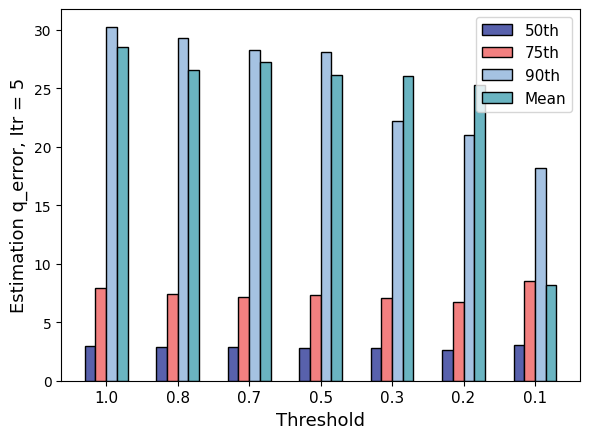

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    # [2.91, 8.01, 30.26, 30.81],  # No filtering
    # [2.861239903979883, 7.87554797894918, 30.73927293771044, 28.968690279696023],  
    # [2.817712420075839, 7.274546326036709, 23.333473220587972, 24.723109124289415],  
    # [2.763041990381155, 7.916872304402786, 27.97584943287697, 25.127764382076393],  
    
    [2.942588177674819,7.896876269967802,30.246500662650746,28.479072481706275],
    [2.894209579908511,7.375149645848753,29.293164129447742,26.549199583437964],  
    [2.8713314808354085,7.141800711452289,28.24725576453913,27.26909462051888],

    [2.7912266507301515,7.349111757409771,28.074047491793117,26.101342226951086],
    [2.797550021230929,7.035715425557446,22.211494265367996,26.054492827309723],
    [2.6607780576616986,6.746265552662037,20.995071491034277,25.23580664688976],
    [3.0220645500118035,8.54416727626197,18.1782888703042,8.177310889770595]
])

# 定义阈值和指标
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3', '0.2', '0.1']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Comparison Across Different Thresholds of Uncertainty', fontsize=13, fontweight='bold')
ax.set_xlabel('Threshold', fontsize=13)
ax.set_ylabel('Estimation q_error, Itr = 5', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/itr5.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

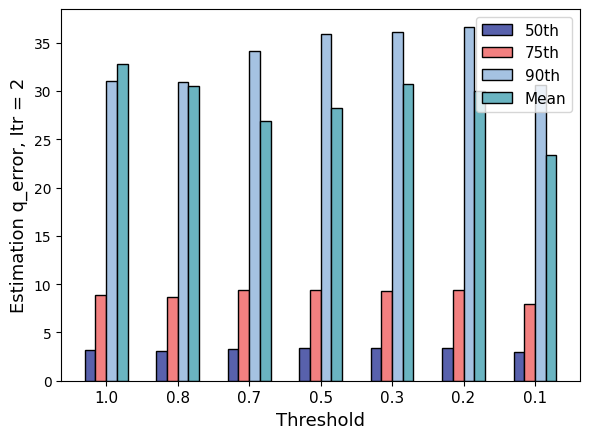

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    # [2.91, 8.01, 30.26, 30.81],  # No filtering
    # [2.861239903979883, 7.87554797894918, 30.73927293771044, 28.968690279696023],  
    # [2.817712420075839, 7.274546326036709, 23.333473220587972, 24.723109124289415],  
    # [2.763041990381155, 7.916872304402786, 27.97584943287697, 25.127764382076393],  
    
    [3.1304372849596818,8.857153184172677,31.06697708062962,32.807393817840904],
    [3.113826086885737,8.694043197318834,30.95289338626348,30.519567537930037],  
    [3.334025721423251,9.418682547951914,34.107247262092734,26.90483547553467],
    [3.3387747725655927,9.419107051977754,35.92931376977958,28.274624295493087],

    [3.3549187888680603,9.280746325159207,36.060444043341285,30.72645208387669],
    [3.396446687369346,9.414367795002388,36.65435841310315,29.95165541431016],
    [2.976813541006918,7.981141018374297,30.608458826132818,23.331427544046445]
])

# 定义阈值和指标
# thresholds = ['No filtering', '1.0', '0.8', '0.7', '0.5', '0.3']
thresholds = ['1.0', '0.8', '0.7', '0.5', '0.3', '0.2', '0.1']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Comparison Across Different Thresholds of Uncertainty', fontsize=13, fontweight='bold')
ax.set_xlabel('Threshold', fontsize=13)
ax.set_ylabel('Estimation q_error, Itr = 2', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/itr2.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

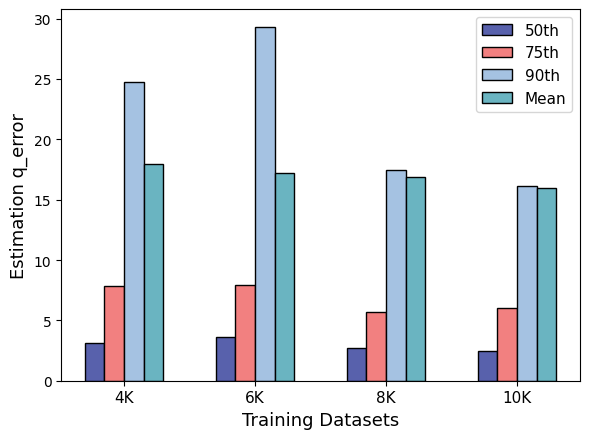

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    [3.15, 7.83, 24.75, 17.97],  # 4k
    [3.64, 7.90, 29.33, 17.25],  # 6k
    [2.69, 5.71, 17.45, 16.86],  # 8k
    [2.44, 6.03, 16.11, 15.96]   # 10k
])

# 定义阈值和指标
thresholds = ['4K', '6K', '8K', '10K']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建一个固定大小的图形
# fig3, ax3 = plt.subplots(figsize=(6, 4.5))
fig, ax = plt.subplots(figsize=(6, 4.5))

# 绘制柱状图
x = np.arange(len(thresholds))
width = 0.15
# colors = ['#CAC8EF', '#9BDCFC', '#C9EFBE', '#F0CFEA']
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, data[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 设置标题和坐标轴标签
# ax.set_title('Robustness to Various Training Sizes', fontsize=13, fontweight='bold')
ax.set_xlabel('Training Datasets', fontsize=13)
ax.set_ylabel('Estimation q_error', fontsize=13)

# 设置x轴刻度和标签
ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/robust1.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

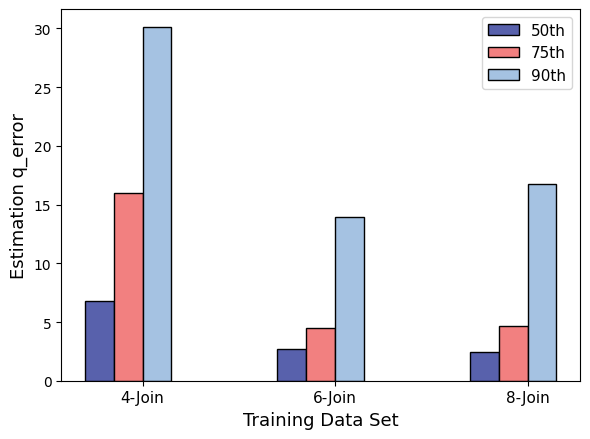

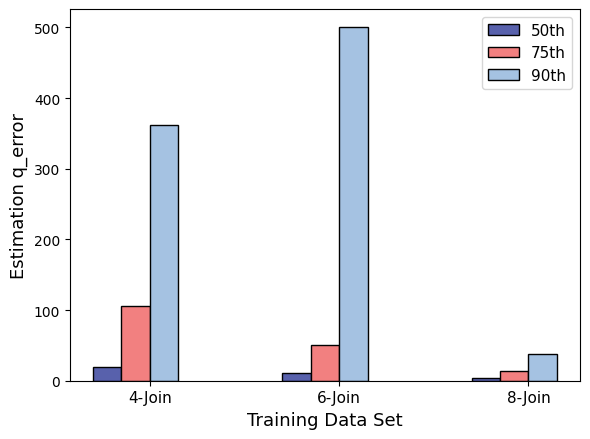

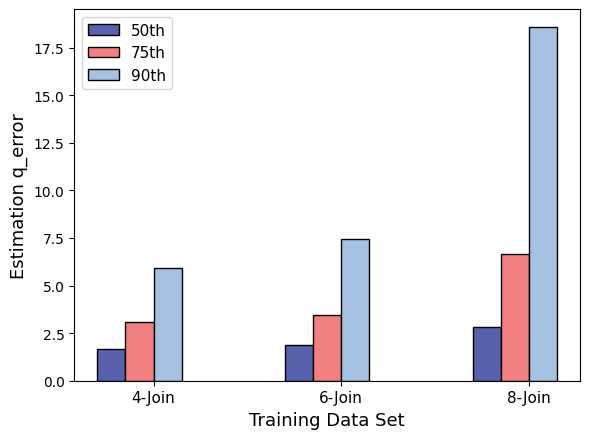

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
model_names = ['SpikingCard']
data = np.array([
    [6.75, 16.02, 30.15], 
    [2.66, 4.47, 13.92], 
    [2.42, 4.69, 16.78], 
    [19.32, 105.69, 362.32], 
    [10.34, 50.90, 500.92], 
    [3.78, 14.25, 37.88]  
])

# 定义阈值和指标
train_thresholds = ['4-Join', '6-Join', '8-Join']
metrics = ['50th', '75th', '90th']

# 颜色配置
# colors = ['#D8BFD8', '#ADD8E6', '#FFA07A', '#FFB6C1']
# line_colors = ['#800080', '#00BFFF', '#FF8C00', '#FF1493']
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

x = np.arange(len(train_thresholds))
width = 0.15

# 图1：训练在不同阈值上，测试在 6-Join
fig1, ax1 = plt.subplots(figsize=(6, 4.5))
for i, metric in enumerate(metrics):
    ax1.bar(x + i * width, data[:3, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# ax1.set_title('Training on Different Thresholds, Testing on 6-Join', fontsize=13, fontweight='bold')
ax1.set_xlabel('Training Data Set', fontsize=13)
ax1.set_ylabel('Estimation q_error', fontsize=13)
ax1.set_xticks(x + 1.5 * width)
ax1.set_xticklabels(train_thresholds, fontsize=11)
ax1.legend(fontsize=11)
fig1.tight_layout()

# 保存图1
fig1.savefig('picture/output_6_join.pdf', format='pdf', dpi=600)

# 图2：训练在不同阈值上，测试在 8-Join
fig2, ax2 = plt.subplots(figsize=(6, 4.5))
for i, metric in enumerate(metrics):
    ax2.bar(x + i * width, data[3:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# ax2.set_title('Training on Different Thresholds, Testing on 8-Join', fontsize=13, fontweight='bold')
ax2.set_xlabel('Training Data Set', fontsize=13)
ax2.set_ylabel('Estimation q_error', fontsize=13)
ax2.set_xticks(x + 1.5 * width)
ax2.set_xticklabels(train_thresholds, fontsize=11)
ax2.legend(fontsize=11)
fig2.tight_layout()

# 保存图2
fig2.savefig('picture/output_8_join.pdf', format='pdf', dpi=600)


data1 = np.array([
    [1.68, 3.09, 5.92], 
    [1.88, 3.43, 7.47], 
    [2.84, 6.67, 18.60]
])
fig3, ax3 = plt.subplots(figsize=(6, 4.5))
for i, metric in enumerate(metrics):
    ax3.bar(x + i * width, data1[:, i], width, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# ax3.set_title('Training on Different Thresholds, Testing on 4-Join', fontsize=13, fontweight='bold')
ax3.set_xlabel('Training Data Set', fontsize=13)
ax3.set_ylabel('Estimation q_error', fontsize=13)
ax3.set_xticks(x + 1.5 * width)
ax3.set_xticklabels(train_thresholds, fontsize=11)
ax3.legend(fontsize=11)
fig3.tight_layout()

# 保存图2
fig3.savefig('picture/output_4_join.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

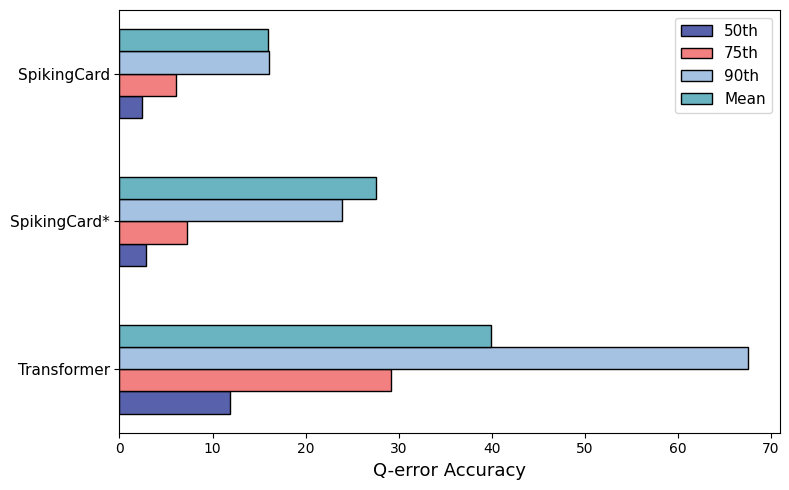

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
data = np.array([
    [11.871489965171655, 29.157974442975423, 67.56861674445932, 39.9715510015071],
    [2.8613224260718706,7.292633202930826,23.89838182833357,27.619534891542212],
    [2.4493386752295017, 6.039931998972188, 16.10896011951156, 15.961958925688826]
])
q_error_accuracy = [11.871489965171655, 29.157974442975423, 67.56861674445932, 445.67980846171963, 39.9715510015071]
q_error_accuracy_0 = [2.4493386752295017, 6.039931998972188, 16.10896011951156, 390.84986937469375, 15.961958925688826]

# 定义阈值和指标
thresholds = ['Transformer','SpikingCard*','SpikingCard']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制横向柱状图
y = np.arange(len(thresholds))
height = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.barh(y + i * height, data[:, i], height, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 定制图表
# ax.set_title('Comparison between Transformer and SpikingCard', fontsize=13, fontweight='bold')
ax.set_xlabel('Q-error Accuracy', fontsize=13)
# ax.set_ylabel('Method', fontsize=13)

# 设置y轴刻度和标签
ax.set_yticks(y + 1.5 * height)
ax.set_yticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/comparison_horizontal.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()

In [16]:
import torch
print(torch.__version__)

1.12.1


/opt/conda/envs/lpce/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


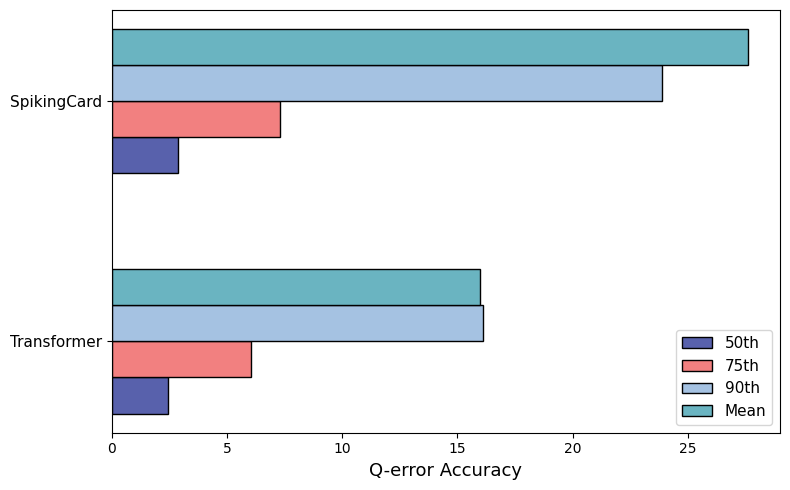

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
data = np.array([
    [2.4493386752295017, 6.039931998972188, 16.10896011951156, 15.961958925688826],  
    [2.8613224260718706,7.292633202930826,23.89838182833357,27.619534891542212]
])
q_error_accuracy = [11.871489965171655, 29.157974442975423, 67.56861674445932, 445.67980846171963, 39.9715510015071]
q_error_accuracy_0 = [2.4493386752295017, 6.039931998972188, 16.10896011951156, 390.84986937469375, 15.961958925688826]

# 定义阈值和指标
thresholds = ['Transformer', 'SpikingCard']
metrics = ['50th', '75th', '90th', 'Mean']

# 创建图形和轴
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制横向柱状图
y = np.arange(len(thresholds))
height = 0.15
colors = ['#5861AC', '#F28080', '#A5C2E2', '#6AB4C1', '#72C3A3']

for i, metric in enumerate(metrics):
    ax.barh(y + i * height, data[:, i], height, color=colors[i], edgecolor='black', linewidth=1, label=metric)

# 定制图表
# ax.set_title('Comparison between Transformer and SpikingCard', fontsize=13, fontweight='bold')
ax.set_xlabel('Q-error Accuracy', fontsize=13)
# ax.set_ylabel('Method', fontsize=13)

# 设置y轴刻度和标签
ax.set_yticks(y + 1.5 * height)
ax.set_yticklabels(thresholds, fontsize=11)

# 添加图例
ax.legend(fontsize=11)

# 确保布局紧凑
fig.tight_layout()

# 保存为 PDF 格式
plt.savefig('picture/comparison_horizontal.pdf', format='pdf', dpi=600)

# 显示图像
plt.show()